In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree , export_text
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import LabelEncoder


In [99]:
churn=pd.read_csv('telecom_customer_churn.csv')
churn

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [100]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [101]:
churn['Age']=churn['Age'].astype('float64')
churn['Total Extra Data Charges']=churn['Total Extra Data Charges'].astype('float64')
churn['Tenure in Months']=churn['Tenure in Months'].astype('float64')
churn['Zip Code']=churn['Zip Code'].astype('float64')
churn['Number of Referrals']=churn['Number of Referrals'].astype('float64')

In [102]:
churn['Churn Reason']

0                                 NaN
1                                 NaN
2       Competitor had better devices
3             Product dissatisfaction
4                 Network reliability
                    ...              
7038                              NaN
7039          Product dissatisfaction
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object

In [103]:
churn.nunique()[churn.nunique()>5]

Customer ID                          7043
Age                                    62
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Avg Monthly Long Distance Charges    3583
Avg Monthly GB Download                49
Monthly Charge                       1591
Total Charges                        6540
Total Refunds                         500
Total Extra Data Charges               16
Total Long Distance Charges          6068
Total Revenue                        6975
Churn Reason                           20
dtype: int64

In [104]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   float64
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   float64
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   float64
 10  Tenure in Months                   7043 non-null   float64
 11  Offer                              3166 non-null   objec

In [105]:
(churn['Avg Monthly Long Distance Charges'].isna()==churn['Avg Monthly Long Distance Charges'].isna()).sum()


np.int64(7043)

<Axes: xlabel='Churn Reason'>

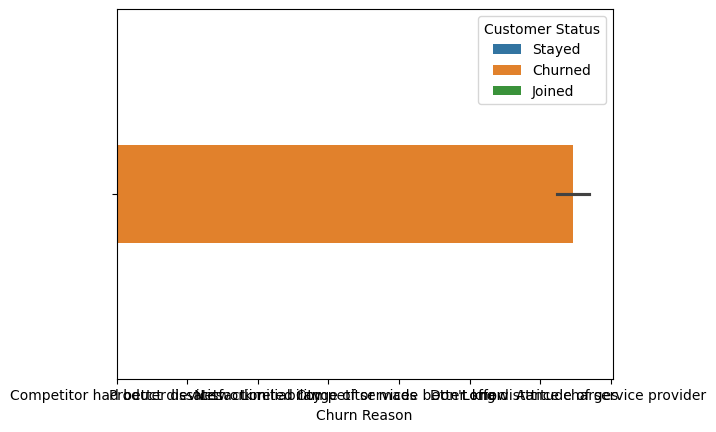

In [106]:

sns.barplot( x='Churn Reason',hue='Customer Status',data=churn)

In [107]:
churn.drop(labels='Offer',axis=1,inplace=True)
churn.drop(labels='Customer ID',axis=1,inplace=True)
churn.drop(labels='Number of Dependents',axis=1,inplace=True)
churn.drop(labels='City',axis=1,inplace=True)


In [108]:
# churn.drop(labels='Churn Reason',axis=1,inplace=True)


In [109]:
churn['Churn Category']

0                   NaN
1                   NaN
2            Competitor
3       Dissatisfaction
4       Dissatisfaction
             ...       
7038                NaN
7039    Dissatisfaction
7040                NaN
7041                NaN
7042                NaN
Name: Churn Category, Length: 7043, dtype: object

In [110]:
churn.columns

Index(['Gender', 'Age', 'Married', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [111]:
X=churn[['Tenure in Months', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Category']]
y=churn['Customer Status']

In [112]:
columns=[i for i in X if X[i].dtype==object]
encoding=LabelEncoder()
for i in columns:
    X[i]=encoding.fit_transform(X[i])


C:\Users\shrey\AppData\Local\Temp\ipykernel_16644\2864009987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=encoding.fit_transform(X[i])


In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)
X_train.shape,y_train.shape,X_test.shape

((5282, 5), (5282,), (1761, 5))

In [114]:
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.9988642816581488)

In [115]:
model.feature_importances_

array([0.04529957, 0.0478906 , 0.03950889, 0.14184058, 0.72546037])

In [116]:
X.columns[model.feature_importances_>.01]

Index(['Tenure in Months', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Category'],
      dtype='object')

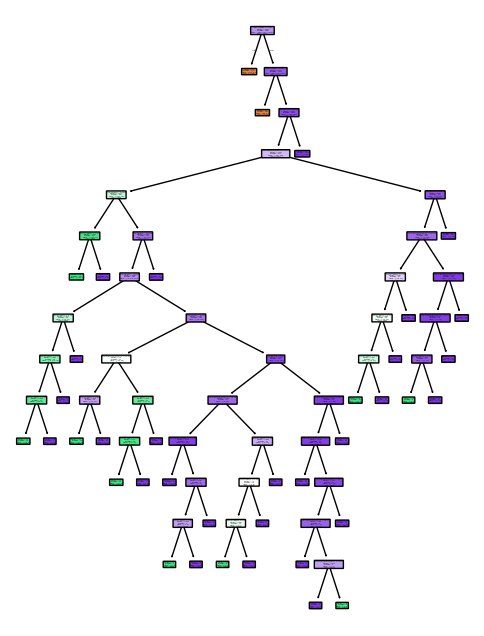

In [117]:


plt.figure(figsize=[6,8])
plot_tree(model,feature_names=X.columns,class_names=model.classes_,rounded=True,filled=True)
plt.show()


In [118]:
model.get_depth()

14

In [119]:
model.feature_importances_

array([0.04529957, 0.0478906 , 0.03950889, 0.14184058, 0.72546037])

<function matplotlib.pyplot.show(close=None, block=None)>

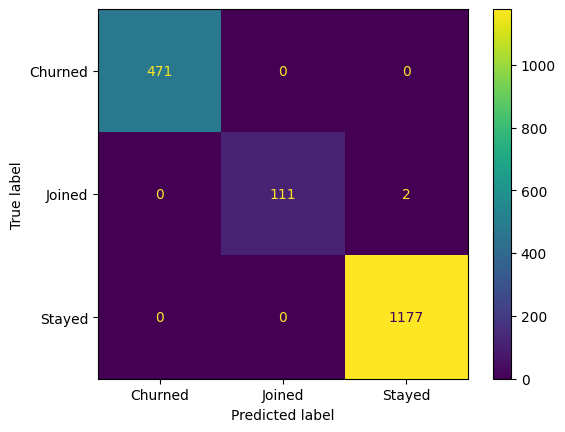

In [120]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show

In [121]:
# it will give 100% accuracy if i use 'churn catagory' column

In [122]:
!